# Name : Samer AlTaki
### Data Science & Business Analytics 
## Task3 :
### Exploratory Data Analysis - Retail

#   

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from plotly import __version__
import cufflinks as cf

In [4]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

In [5]:
data = pd.read_csv("SampleSuperstore.csv")

In [6]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.duplicated().sum()

17

In [9]:
data.drop_duplicates(keep="first",inplace=True)
data.shape

(9977, 13)

In [10]:
data.describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

In [11]:
correlation = data.corr()
correlation

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000

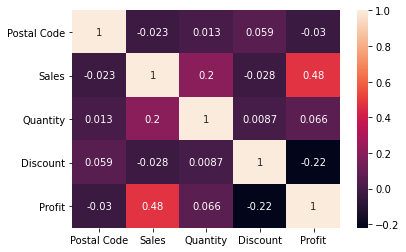

In [12]:
sns.heatmap(correlation,annot=True)

In [13]:
data_con=data.select_dtypes(include=[np.number])

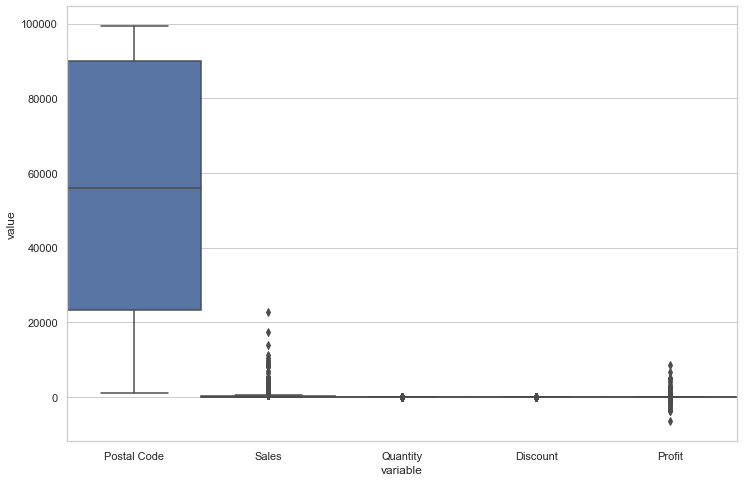

In [14]:
#BoxPlot

plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data_con), width=1)

plt.show()

In [15]:
data_con.iplot(kind='box')


In [16]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [17]:
remove_outlier(data,k=3.33)


In [18]:
ds_con=ds.select_dtypes(include=[np.number])
ds_con.iplot(kind='box')


In [19]:
print(ds_con)

      Postal Code     Sales  Quantity  Discount    Profit
0           42420  261.9600         2      0.00   41.9136
1           42420  731.9400         3      0.00  219.5820
2           90036   14.6200         2      0.00    6.8714
3           33311  957.5775         5      0.45 -383.0310
4           33311   22.3680         2      0.20    2.5164
...           ...       ...       ...       ...       ...
9989        33180   25.2480         3      0.20    4.1028
9990        92627   91.9600         2      0.00   15.6332
9991        92627  258.5760         2      0.20   19.3932
9992        92627   29.6000         4      0.00   13.3200
9993        92683  243.1600         2      0.00   72.9480

[9889 rows x 5 columns]


In [20]:
ds.shape


(9889, 13)

In [21]:
ds.head()


Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [22]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9889 non-null   object 
 1   Segment       9889 non-null   object 
 2   Country       9889 non-null   object 
 3   City          9889 non-null   object 
 4   State         9889 non-null   object 
 5   Postal Code   9889 non-null   int64  
 6   Region        9889 non-null   object 
 7   Category      9889 non-null   object 
 8   Sub-Category  9889 non-null   object 
 9   Sales         9889 non-null   float64
 10  Quantity      9889 non-null   int64  
 11  Discount      9889 non-null   float64
 12  Profit        9889 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [23]:
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("-----------------------------------------------------------")

Number of unique entries in Ship Mode are 4
-----------------------------------------------------------
Number of unique entries in Segment are 3
-----------------------------------------------------------
Number of unique entries in Country are 1
-----------------------------------------------------------
Number of unique entries in City are 531
-----------------------------------------------------------
Number of unique entries in State are 49
-----------------------------------------------------------
Number of unique entries in Region are 4
-----------------------------------------------------------
Number of unique entries in Category are 3
-----------------------------------------------------------
Number of unique entries in Sub-Category are 17
-----------------------------------------------------------


In [24]:
ds.iplot(x="Region", y="Sales",kind='bar',title='Region VS Sales',xTitle='Region',yTitle='Sales') #visualisation

In [25]:
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [26]:
data['Sub-Category'].value_counts()


Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

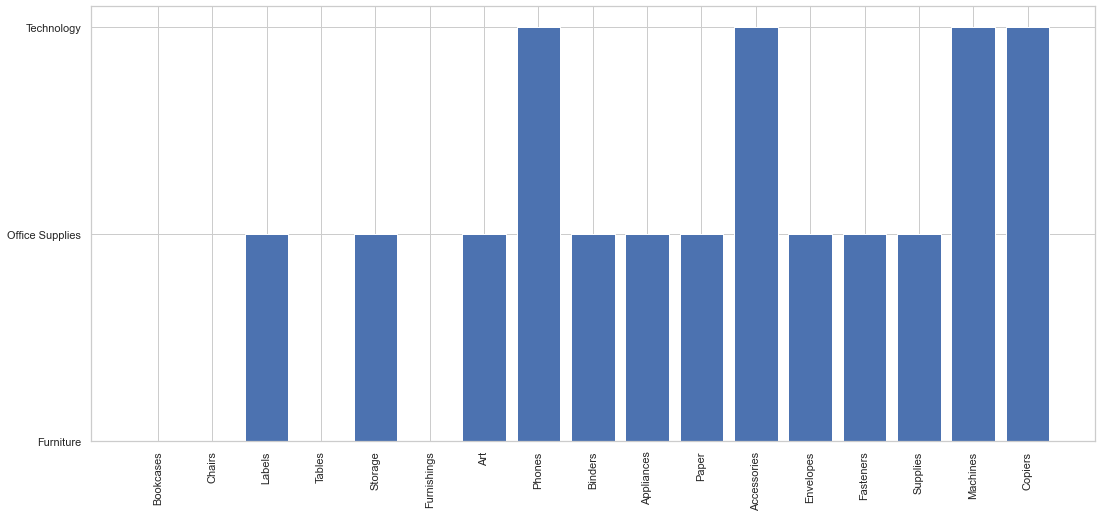

In [27]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category', 'Category', data=data)
plt.xticks(rotation=90)

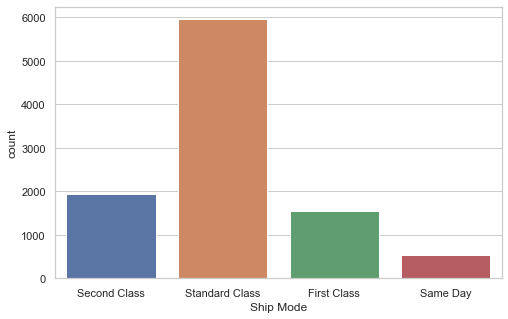

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Ship Mode'])

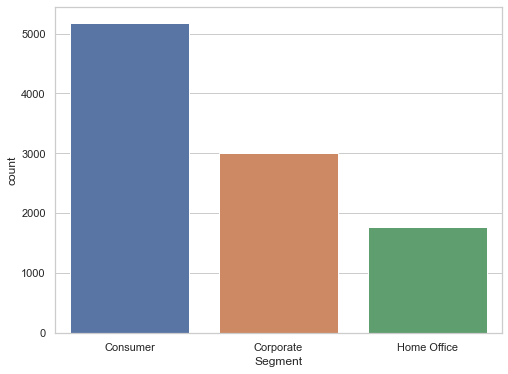

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Segment'])
plt.show()

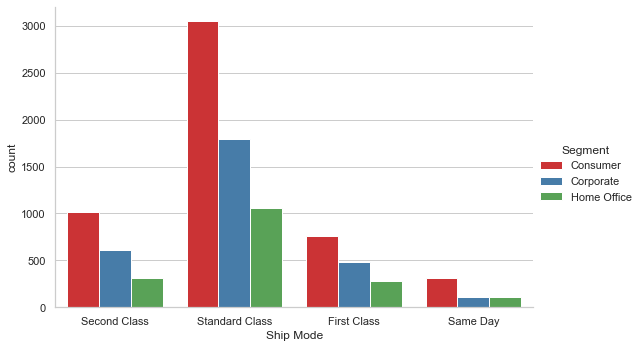

In [30]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

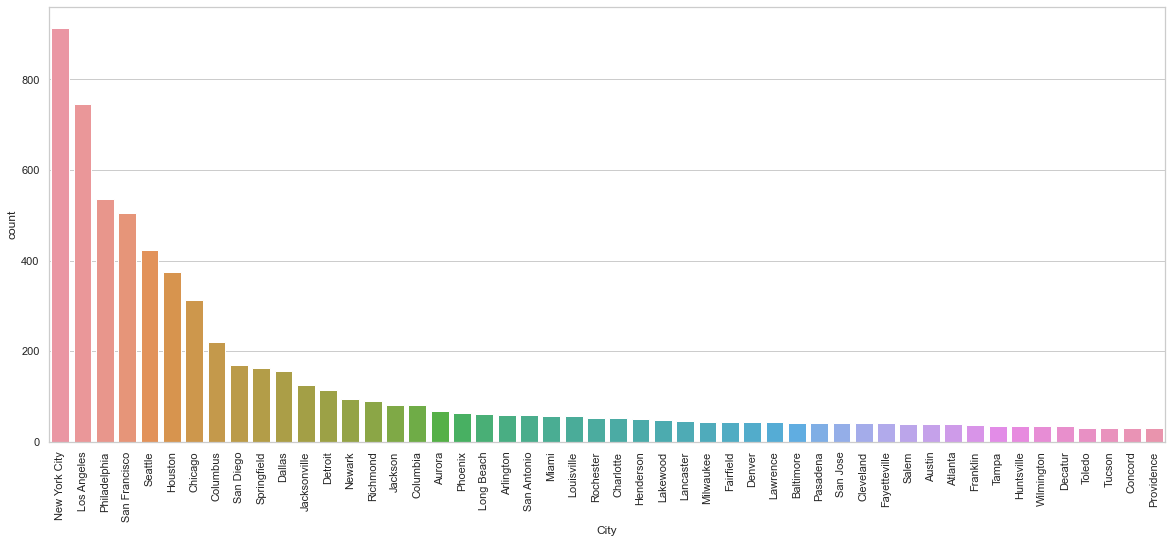

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

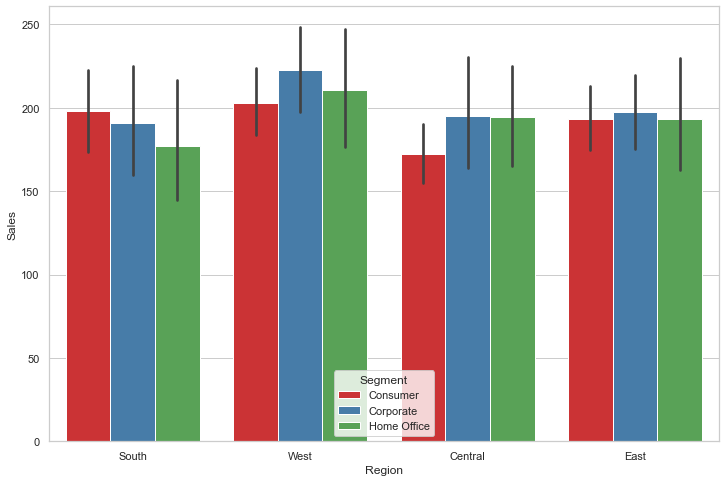

In [32]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

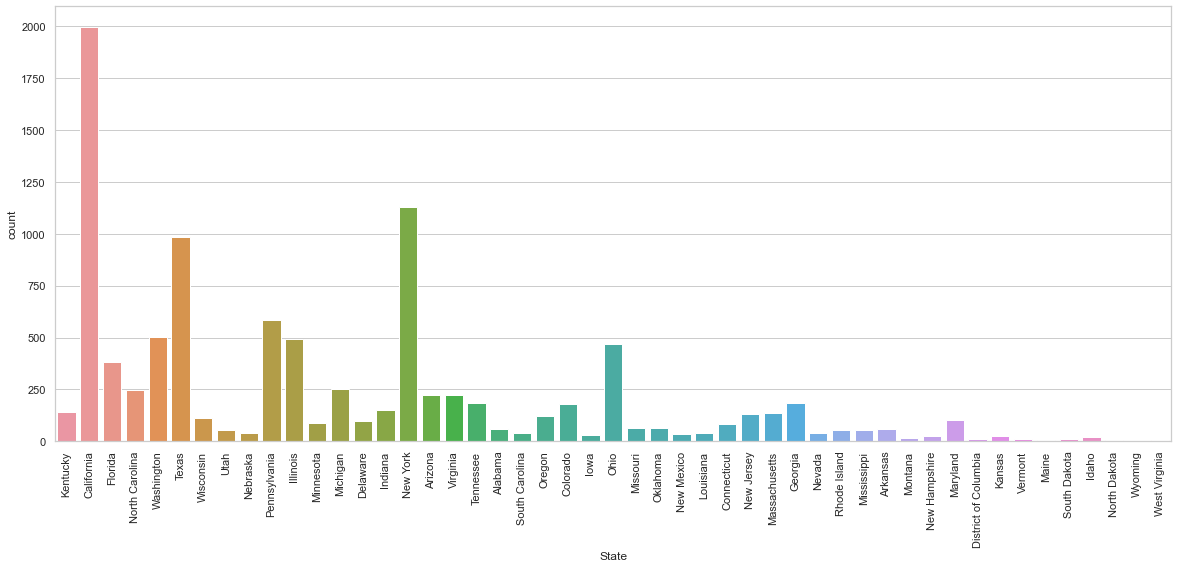

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)

In [34]:
ds.iplot(x="Sub-Category", y="Sales",kind='bar',colors='orange',
         title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

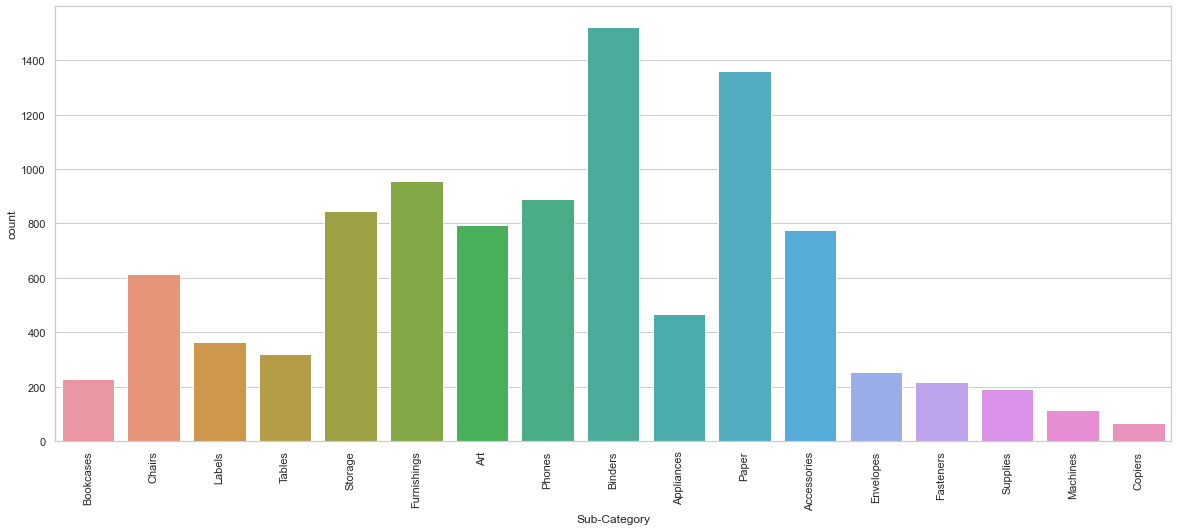

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

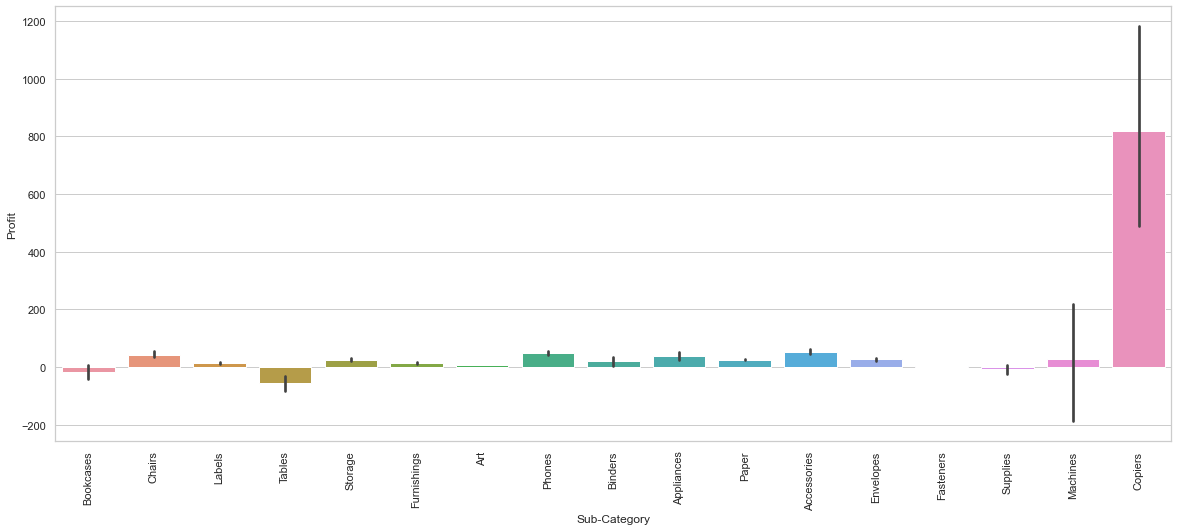

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])
plt.xticks(rotation=90)

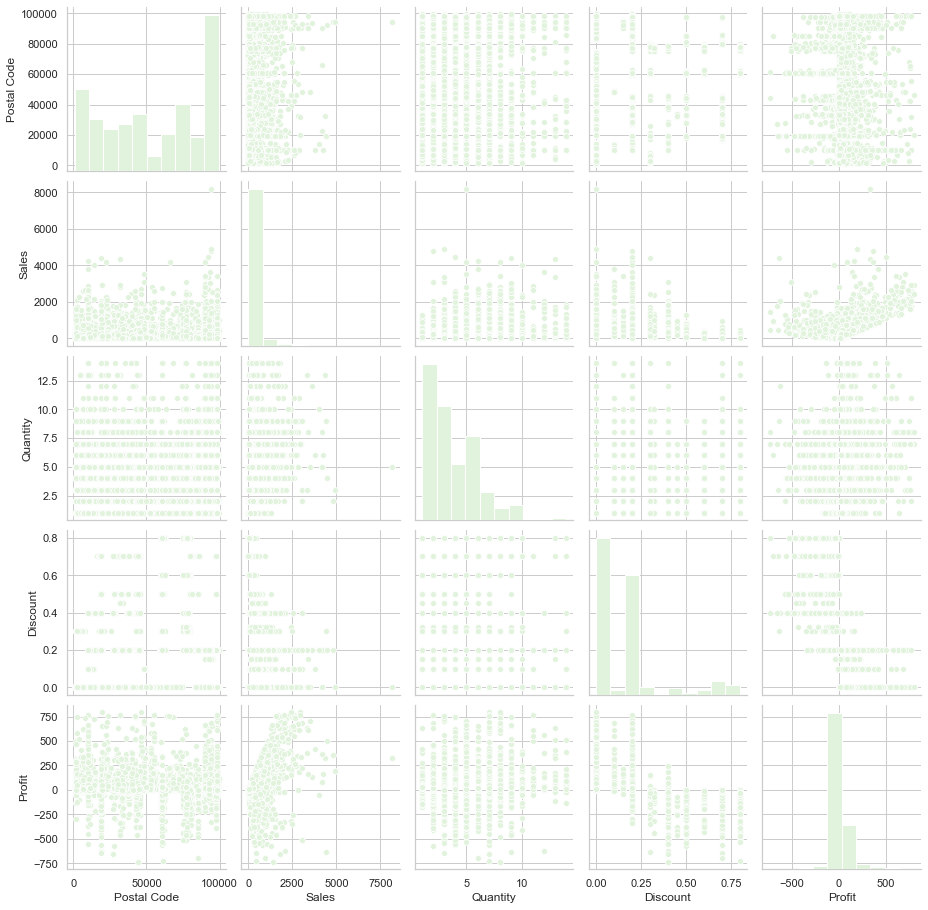

In [37]:
sns.set_palette('Greens')
sns.pairplot(ds)

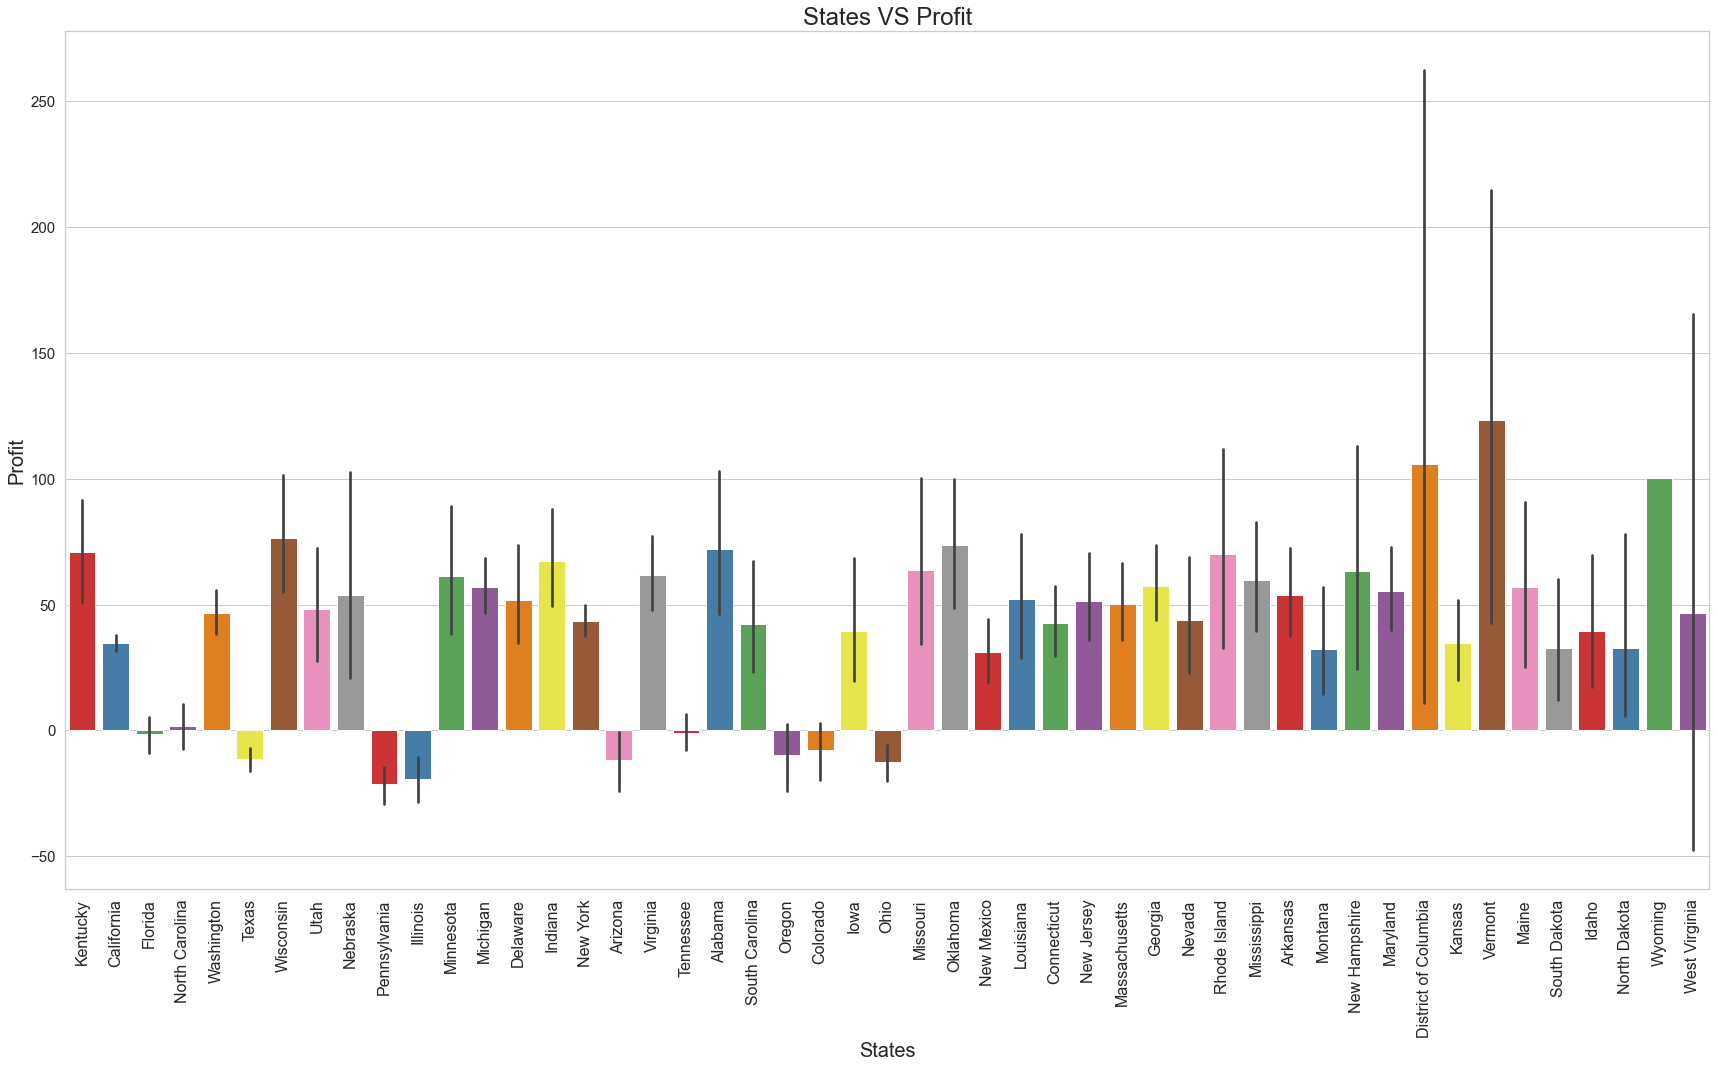

In [38]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

In [39]:
ds.iplot(kind='bar',x="Category", y="Profit",title="Category VS Profit",xTitle="Category",yTitle='Profit',colors='magenta')

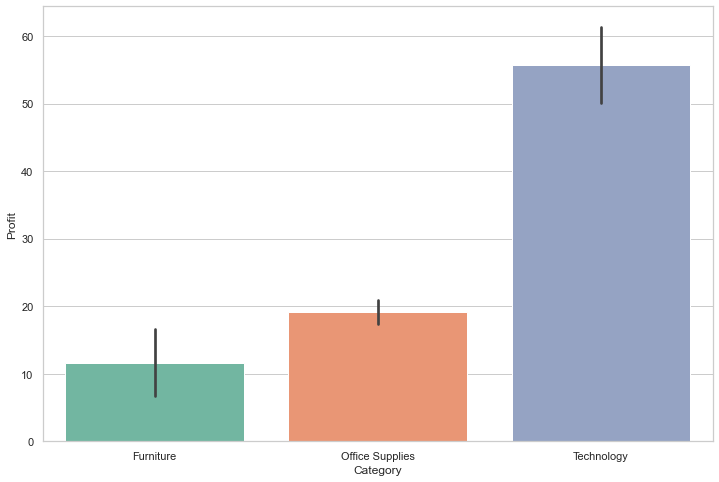

In [40]:

plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Set2")

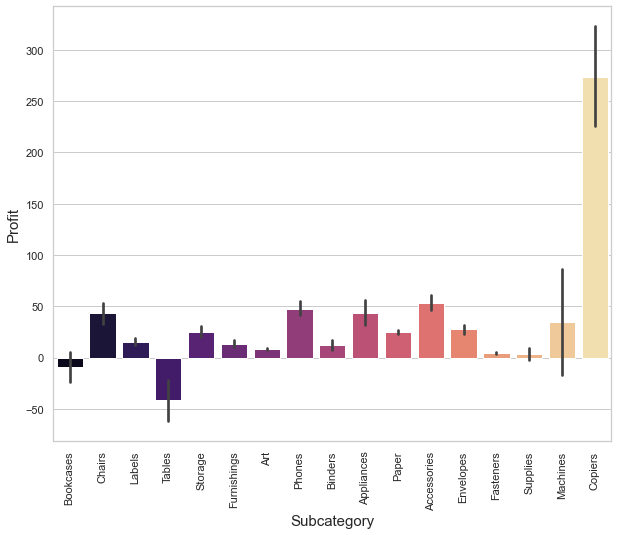

In [41]:

plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [42]:
ds_tech=ds[(ds['Category']=="Technology")]


Text(0, 0.5, 'Sales')

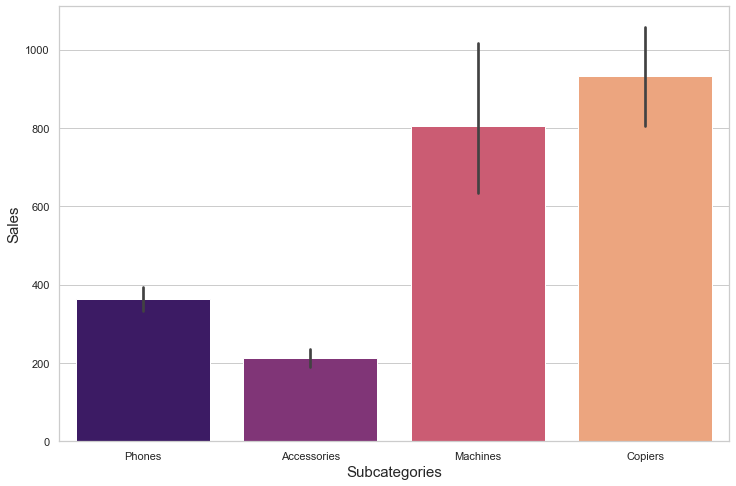

In [43]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

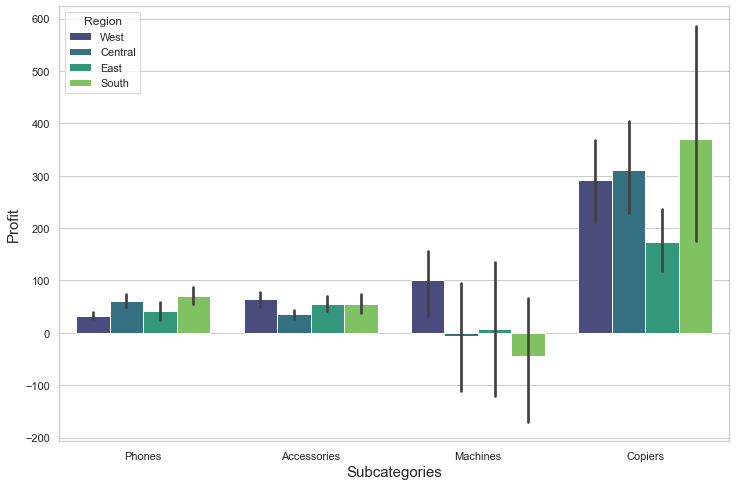

In [44]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

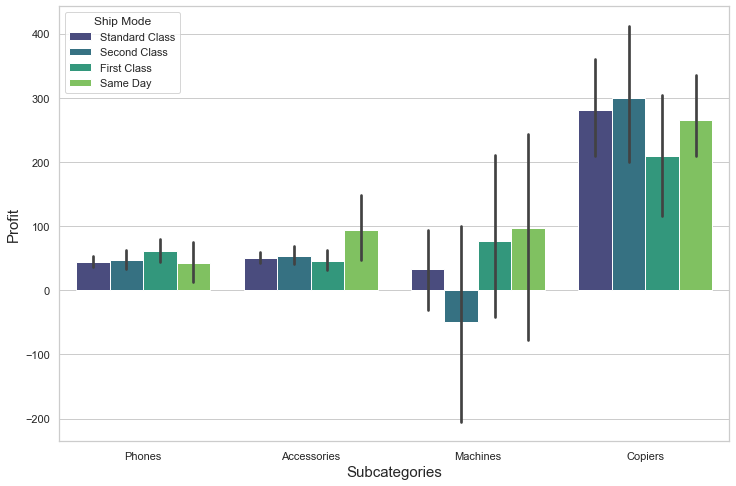

In [45]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Ship Mode", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)